Aprendizaje online y gradiente descendente estocástico
===

* 7:00 min | Ultima modificación: Marzo 29, 2021 | [YouTube]

## Definición del problema de etsimación de parámetros

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

## Función de pérdida y su derivada

La sumatoria de errores al cuadrado es definido como:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - y_i)^2$$

Si se tiene en cuenta que el error instantáneo se define como:

$$
e_i = d_i - y_i
$$

la ecuación anterior se puede reescribir como:

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_p (d_i - y_i)^2 \\
    & =  \sum_p e_i^2
\end{split}
$$

De acuerdo con el método del gradiente:

$$
\begin{split}
\mathbf{w}_k 
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}^2(\mathbf{w}_{k-1}) \\
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \left( \sum_i e_i^2 \right)
\end{split}
$$

donde $\mathbf{w} = [w_0, w_1]$.

## Aprendizaje online

La ecuación anterior se puede reescribir como:

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \sum_i \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

El aprendizaje **online** se obtiene al hacer **una** corrección de los parámetros de forma secuencial para cada punto $i$. El nombre del método se deriva del hecho de que los puntos $(x_i, y_i)$ pueden presentarse al algoritmo como un stream de datos.

Es decir, la ecuación de corrección cambia a:


$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

El proceso es el siguiente:

* Se computa el gradiente instantáneo para el punto $i$.

* Se realiza la corrección del vector de parámetros $\mathbf{w}_k$ con el gradiente para el punto $i$.

* Se pasa al siguiente punto ($i$ = $i$ + 1) y se rotorna al primer paso.

## Derivadas

Las derivadas del error instantáneo son:

$$
\begin{split}
    \frac{\partial}{\partial w_0} e^2_i
        & = -2 e_i \\
\end{split}
$$

$$
\begin{split}
    \frac{\partial}{\partial w_1} e^2_i
        & = -2 e_i x_i \\
\end{split}
$$

## Ejemplo numérico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

#
# Datos del problema
# 
x_values = [
    0.6231, 0.7460, 0.1087, 0.3654, 0.3065, 0.6886, 
    0.4966, 0.2618, 0.7607, 0.4424, 0.7731,
]

d_values = [
    1.6266, 1.8508, 0.9519, 1.2828, 1.2283, 1.8722, 
    1.4657, 1.1097, 1.7826, 1.4267, 1.8248,
]

#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def compute_SSE(w0, w1):
    return sum(
        [
            (d_value - w0 - w1 * x_value) ** 2
            for x_value, d_value in zip(x_values, d_values)
        ]
    )


#
# Función auxililar para graficar el contorno
#
def plot_contour():

    W0 = np.linspace(0.0, 0.8, 50)
    W1 = np.linspace(2.4, 3.2, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = compute_SSE(W0, W1)
    
    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60]

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect("equal", "box")

    ax.contourf(
        W0,
        W1,
        F,
        cmap=cm.Greys,
        levels=levels,
        alpha=0.8,
    )

    ax.contour(
        W0,
        W1,
        F,
        colors="gray",
        levels=levels,
    )
    ax.grid()
    
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')

In [2]:
def compute_instant_gradients_e2(w0, w1, x_value, d_value):
    
    instant_error = d_value - w0 - w1 * x_value
    instant_gradients_e2_w0 = -2 * instant_error
    instant_gradients_e2_w1 = -2 * instant_error * x_value
    
    return instant_gradients_e2_w0, instant_gradients_e2_w1

## Ecuación de mejora

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

In [3]:
def compute_iteration(w0, w1, learning_rate, x_value, d_value):
    
    instant_gradients_e2_w0, instant_gradients_e2_w1 = compute_instant_gradients_e2(
        w0, w1, x_value, d_value
    )
    
    w0 -= learning_rate * instant_gradients_e2_w0
    w1 -= learning_rate * instant_gradients_e2_w1
    
    return w0, w1

## Proceso iterativo del aprendizaje online

 w0 = 0.2106
 w1 = 2.4542
SSE = 0.6276



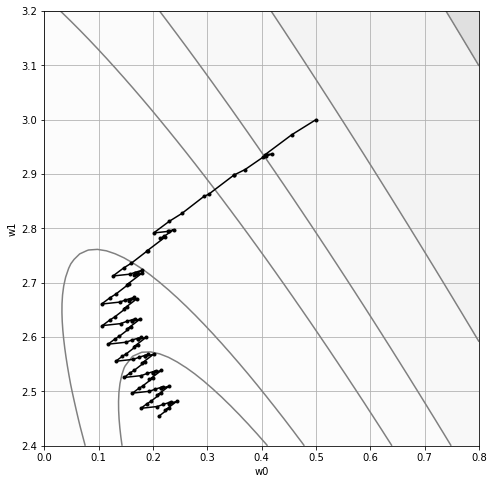

In [4]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [compute_SSE(w0, w1)]

learning_rate = 0.03

for epoch in range(10):

    for x_value, d_value in zip(x_values, d_values):

        w0, w1 = compute_iteration(w0, w1, learning_rate, x_value, d_value)

        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append(compute_SSE(w0, w1))

print(
    " w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, compute_SSE(w0, w1))
)

plot_contour()
plt.plot(history_w0, history_w1, marker=".", color="black");

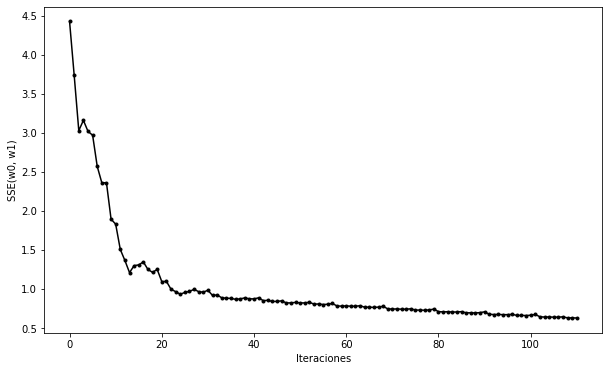

In [5]:
plt.figure(figsize=(10,6))
plt.plot(history_f, ".-k")
plt.xlabel('Iteraciones')
plt.ylabel('SSE(w0, w1)')
plt.show()

## Gradiente descendente estocástico

El método del gradiente descendente estocástico es el método de aprendizaje online en el que los patrones se recorren de forma aleatoria.

 w0 = 0.2259
 w1 = 2.4598
SSE = 0.6220



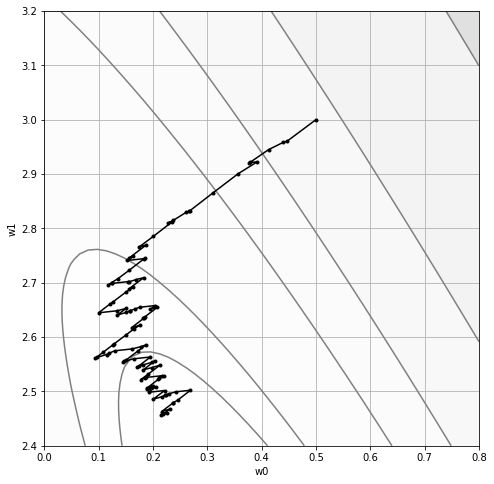

In [6]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [compute_SSE(w0, w1)]

learning_rate = 0.03

for epoch in range(10):

    for n in np.random.choice(len(d_values), len(d_values), replace=False):

        w0, w1 = compute_iteration(w0, w1, learning_rate, x_values[n], d_values[n])

        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append(compute_SSE(w0, w1))

print(
    " w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, compute_SSE(w0, w1))
)

plot_contour()
plt.plot(history_w0, history_w1, marker=".", color="black");

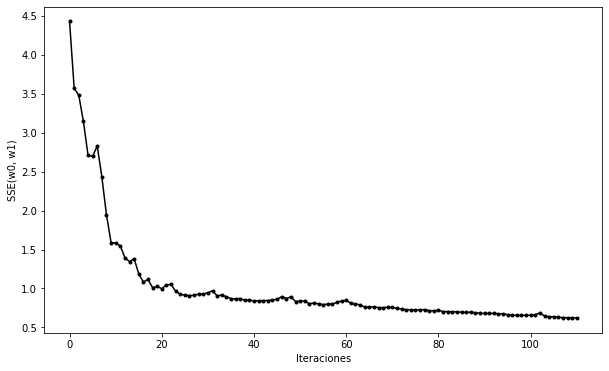

In [7]:
plt.figure(figsize=(10,6))
plt.plot(history_f, ".-k")
plt.xlabel('Iteraciones')
plt.ylabel('SSE(w0, w1)')
plt.show()